In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import visualize
import world_generator
import evaluation
import projections

In [3]:
N_a, M_a, g_ba = world_generator.generate_world(num_regions=256, spread_rate=0.2, self_spread_rate=2.0)
N_a, M_a, g_ba

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [4]:
N_a.shape, M_a.shape, g_ba.shape

((256,), (256, 256), (64, 256))

In [5]:
grid_N_a_0 = visualize.as_grid(N_a)
grid_N_a_0.shape

(16, 16)

In [6]:
results = evaluation.evaluate(M_a, projection_method=projections.Projections().sub_matrix_eigenvector, g_bas=[g_ba], N_a_0=N_a, num_steps=30)

In [10]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

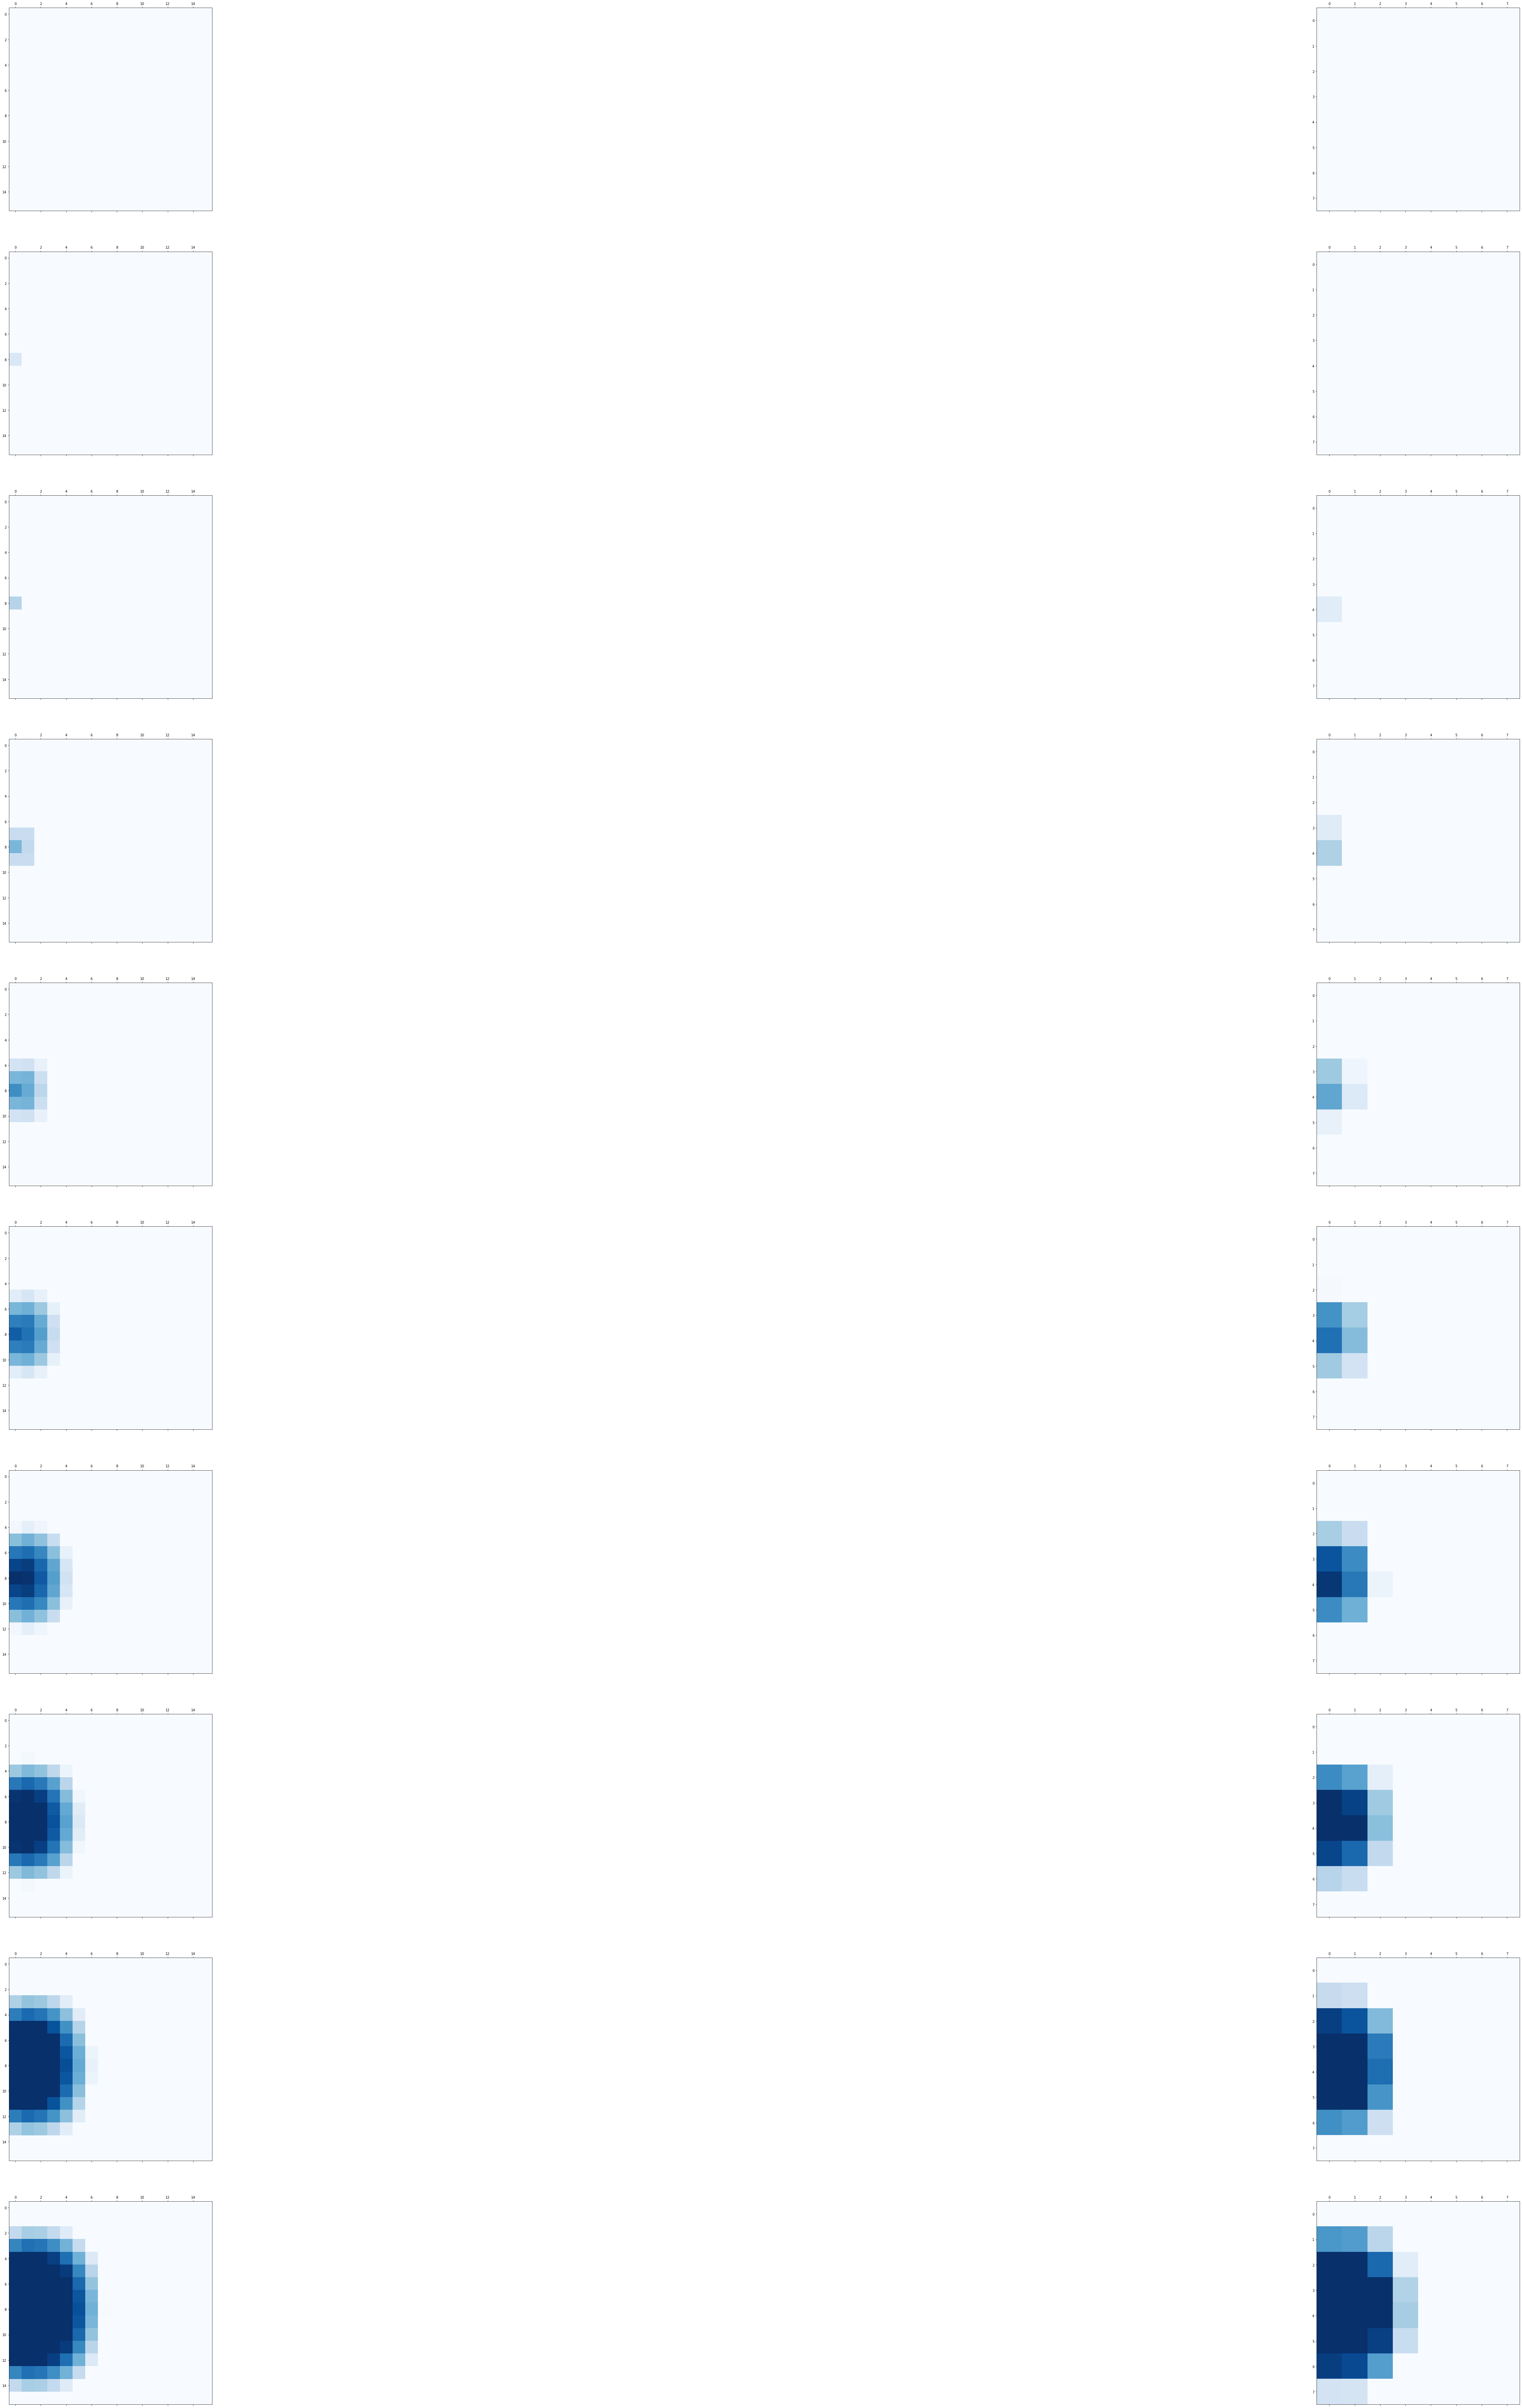

In [14]:
time_steps = len(results['N_a'][:10])
fig, axs = plt.subplots(time_steps, 2) #, figsize=(200, 200))

for t in range(time_steps):
    grid_N_a_t = visualize.as_grid(results['N_a'][t])
    grid_N_b_t = visualize.as_grid(results['N_bs'][1][t])
    set_size(100, 100, axs[t, 0])
    set_size(100, 100, axs[t, 1])
    visualize.plot_grid(grid_N_a_t, grid_N_a_t, ax=axs[t, 0])
    visualize.plot_grid(grid_N_b_t, grid_N_a_t, ax=axs[t, 1])

/home/ubuntu/multi_scale_pandemic/visualize.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


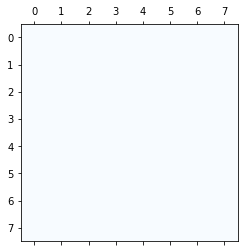

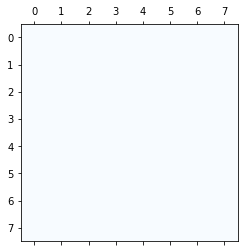

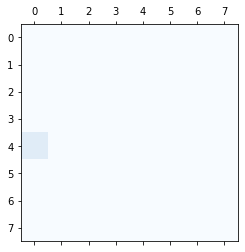

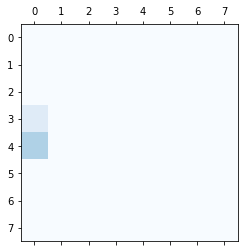

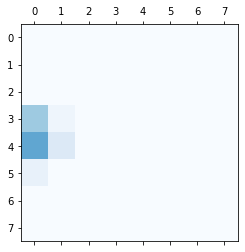

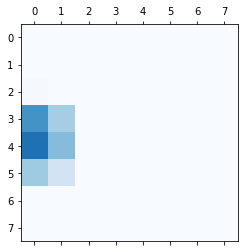

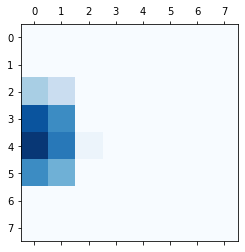

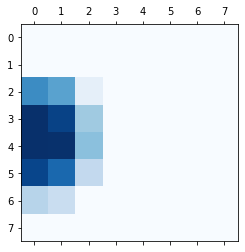

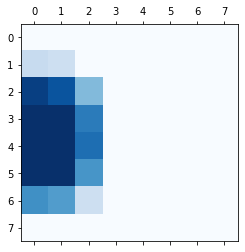

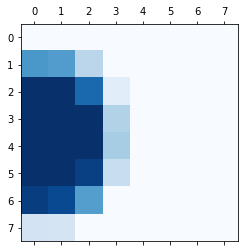

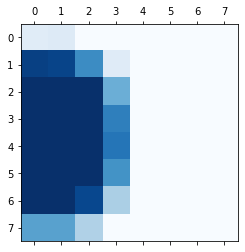

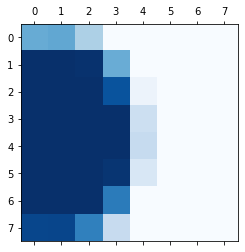

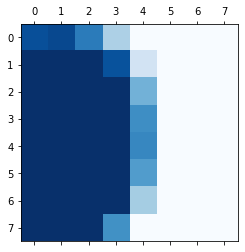

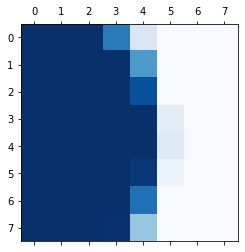

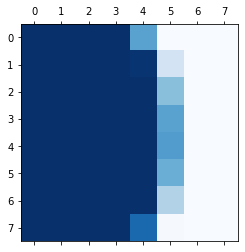

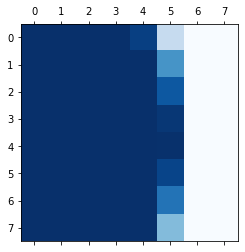

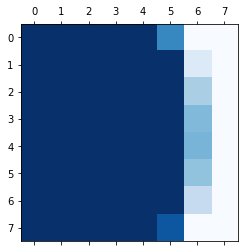

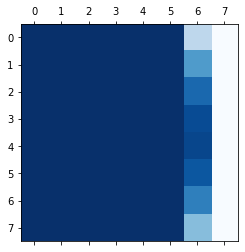

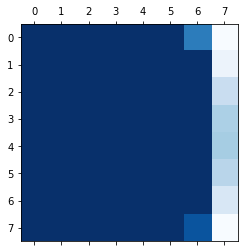

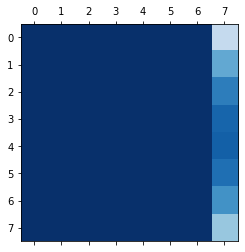

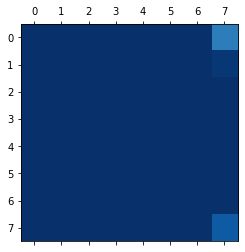

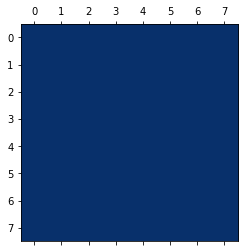

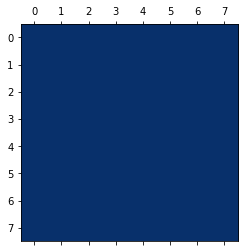

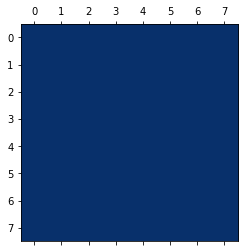

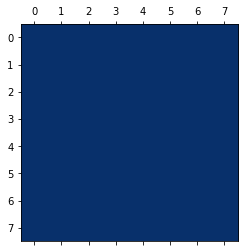

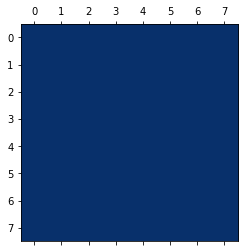

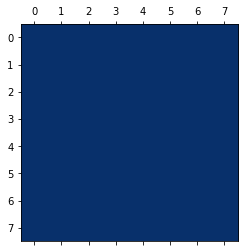

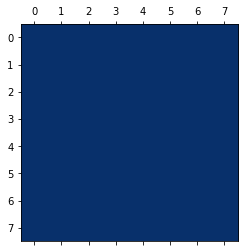

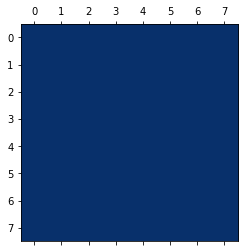

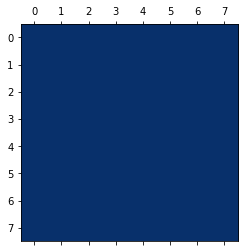

In [8]:
for t, N_b_t in enumerate(results['N_bs'][1]):
    grid_N_b_t = visualize.as_grid(N_b_t)
    visualize.plot_grid(grid_N_b_t, grid_N_a_t)

In [9]:
#M_b_0 # M_a   --> element-wise multiply entries {(i, j)} by \delta M_b  < 1 as a function of N_a
#M_b_1 #        --> 
#...
#M_b_n